In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow import keras
import cv2
from matplotlib import pyplot as plt

In [3]:
import os
import random
from PIL import Image

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
...,...,...
1580465,72c3b1c367e3d559,203092
1580466,7a6a2d9ea92684a6,203092
1580467,9401fad4c497e1f9,203092
1580468,aacc960c9a228b5f,203092


In [6]:
df = df.loc[df["id"].str.startswith('00', na=False), :]
num_classes = len(df["landmark_id"].unique())
num_data = len(df)

In [7]:
num_classes

5346

In [8]:
num_data

6120

In [9]:
data = pd.DataFrame(df["landmark_id"].value_counts())
data.reset_index(inplace = True)

In [10]:
data.head()

,landmark_id,count
0,138982,31
1,83144,14
2,194914,7
3,126637,7
4,9673,6


In [11]:
data.tail()

,landmark_id,count
5341,202886,1
5342,202939,1
5343,202950,1
5344,202972,1
5345,202981,1


In [12]:
data.columns = ['landmark_id', 'count']

In [13]:
data

,landmark_id,count
0,138982,31
1,83144,14
2,194914,7
3,126637,7
4,9673,6
...,...,...
5341,202886,1
5342,202939,1
5343,202950,1
5344,202972,1


In [14]:
data['count'].describe()

count    5346.000000
mean        1.144781
std         0.641260
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        31.000000
Name: count, dtype: float64

(array([0.000e+00, 4.781e+03, 0.000e+00, 4.520e+02, 7.500e+01, 0.000e+00,
        2.200e+01, 9.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

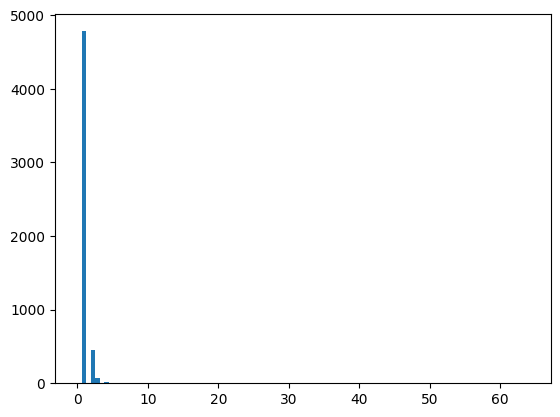

In [15]:
plt.hist(data['count'], 100, range =(0,64), label = 'test')

In [16]:
data['count'].between(0,5).sum()

np.int64(5339)

In [17]:
data['count'].between(5,10).sum()

np.int64(14)

In [18]:
data['count'].between(10,15).sum()

np.int64(1)

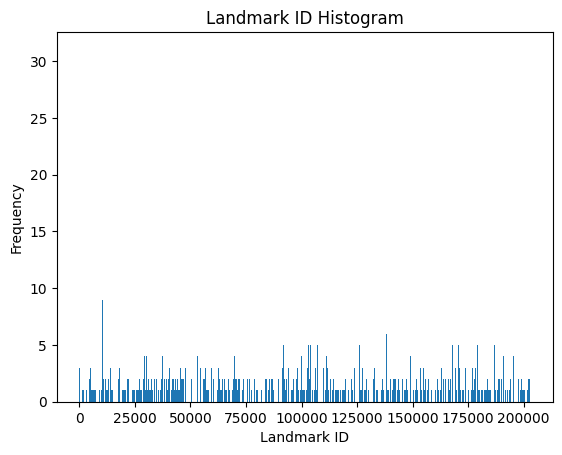

In [19]:
hist, bins = np.histogram(df["landmark_id"], bins=df["landmark_id"].nunique())

# Plot the histogram
plt.hist(df["landmark_id"], bins=bins)
plt.xlabel("Landmark ID")
plt.ylabel("Frequency")
plt.title("Landmark ID Histogram")
plt.show()


In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit(df["landmark_id"])

LabelEncoder()

In [21]:
df

,id,landmark_id
119,00cba0067c078490,27
120,00f928e383e1d121,27
796,009ecdb56b5e9adb,60
1089,00d5d47528839144,124
1133,00e9003a381ab809,134
...,...,...
1578695,0064ecfae82480a0,202886
1579525,0006bd092b119041,202939
1579599,00b7015e96e32c1a,202950
1579715,001e45514ceb27c9,202972


In [22]:
def encode_label(label):
    return labelencoder.transform(label)

In [23]:
def decode_label(label):
    return labelencoder.inverse_transform(label)

In [24]:
base_path = "./images_000/"

In [25]:
def get_img_from_num(num, df):
    row = df.iloc[num, :]
    fname = row['id'] 
    label = row['landmark_id']
    fname = fname + ".jpg"
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    path = os.path.join(base_path, f1, f2, f3, fname)
    img = cv2.imread(path)
    if img is None or img.shape[2] != 3 or img.dtype != np.uint8:
        print("Error loading or invalid image:", path)
        return None, None
    return img, label

4 Sample Images from random classes


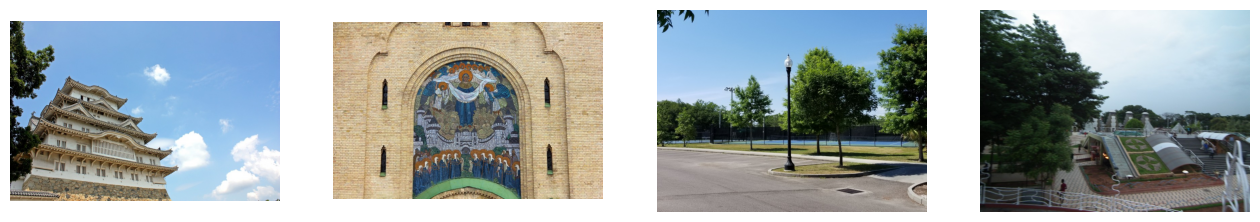

In [26]:
print("4 Sample Images from random classes")
fig = plt.figure(figsize=(16,16))
for i in range(1,5):
    ri = random.choices(os.listdir(base_path), k=3)
    folder = base_path + '/' + ri[0] + '/' + ri[1] + '/' + ri[2]
    random_img = random.choice(os.listdir(folder))
    img = np.array(Image.open(folder+'/'+random_img))
    fig.add_subplot(1,4,i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [27]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop

In [28]:
#Parameters
learning_rate = 0.0001
decay_speed = 1e-6
momentum = 0.09
loss_function = "sparse_categorical_crossentropy"
source_model = VGG19(weights=None)
drop_layer = Dropout(0.5)
drop_layer2 = Dropout(0.5)

In [29]:
model = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
model.add(Dense(num_classes, activation = "softmax"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 224, 224, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,8

 Total params: 161,472,814 (615.97 MB)

 Trainable params: 161,472,808 (615.97 MB)

 Non-trainable params: 6 (24.00 B)

In [30]:
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate),
                                                    loss=loss_function,
                                                    metrics = ["accuracy"])

In [31]:
def image_reshape(img, target_size):
    return cv2.resize(img, target_size)

In [32]:
def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []

    end_image = start + batch_size
    if end_image > len(dataframe):
        end_image = len(dataframe)

    for idx in range(start, end_image):
        n = idx
        img, label = get_img_from_num(n, dataframe)

        # Check if the img is None or not a valid image
        if img is None or img.shape[2] != 3 or img.dtype != np.uint8:
            continue  

        img = image_reshape(img, (224, 224)) / 255.0
        image_array.append(img)
        label_array.append(label)

    label_array = encode_label(label_array)
    label_array = label_array.astype(np.int32)

    return np.array(image_array, dtype=np.float32), label_array

In [34]:
batch_size = 64
epoch_shuffle = True
weight_classes = True
epochs = 1

#split 
train, val = np.split(df.sample(frac=1), [int(0.8*len(df))])
print(len(train))
print(len(val))

4896
1224


In [35]:
for e in range(epochs):
    print("Epoch: ", str(e+1) + "/" + str(epochs))
    if epoch_shuffle:
        train = train.sample(frac = 1)
    for it in range(int(np.ceil(len(train)/batch_size))):
        X_train, y_train = get_batch(train, it*batch_size, batch_size)
        
        model.train_on_batch(X_train, y_train)  
        
model.save('my_model.keras')

Epoch:  1/1
Error loading or invalid image: ./images_000/0\0\f\00fecec8d9172da3.jpg
Error loading or invalid image: ./images_000/0\0\e\00e25093bea54e65.jpg
Error loading or invalid image: ./images_000/0\0\f\00f2b77f7dccc07d.jpg
Error loading or invalid image: ./images_000/0\0\d\00dd5443a6d3855d.jpg
Error loading or invalid image: ./images_000/0\0\e\00e0b2e20c637749.jpg
Error loading or invalid image: ./images_000/0\0\c\00c3bdc3f8a718f6.jpg
Error loading or invalid image: ./images_000/0\0\9\0097cf33c1ca2daa.jpg
Error loading or invalid image: ./images_000/0\0\d\00d9263bff4a6f1a.jpg
Error loading or invalid image: ./images_000/0\0\e\00ec460bc4aaf66a.jpg
Error loading or invalid image: ./images_000/0\0\9\009855438d6403cc.jpg
Error loading or invalid image: ./images_000/0\0\c\00cafedf61e746c3.jpg
Error loading or invalid image: ./images_000/0\0\9\00943f21844a4861.jpg
Error loading or invalid image: ./images_000/0\0\f\00f3c900859c0a2e.jpg
Error loading or invalid image: ./images_000/0\0\a\0

In [36]:
### Test on training set
batch_size = 16

errors = 0
good_preds = []
bad_preds = []

for it in range(int(np.ceil(len(val)/batch_size))):

    X_train, y_train = get_batch(val, it*batch_size, batch_size)

    result = model.predict(X_train)
    cla = np.argmax(result, axis=1)
    for idx, res in enumerate(result):
        if cla[idx] != y_train[idx]:
            errors = errors + 1
            bad_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])
        else:
            good_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])

Error loading or invalid image: ./images_000/0\0\c\00c4ef0da5b971d1.jpg
Error loading or invalid image: ./images_000/0\0\b\00b92804a31c5746.jpg
Error loading or invalid image: ./images_000/0\0\d\00d48d186d2aba94.jpg
Error loading or invalid image: ./images_000/0\0\9\0091d4018132b4ee.jpg
Error loading or invalid image: ./images_000/0\0\b\00b755954b9f6e33.jpg
Error loading or invalid image: ./images_000/0\0\c\00cb8341f2a0578f.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
Error loading or invalid image: ./images_000/0\0\c\00c91b37fa70ad9c.jpg
Error loading or invalid image: ./images_000/0\0\a\00a5e433e69eddc0.jpg
Error loading or invalid image: ./images_000/0\0\b\00bdbfc25c70452c.jpg
Error loading or invalid image: ./images_000/0\0\e\00e5da7de19a260e.jpg
Error loading or invalid image: ./images_000/0\0\c\00cb9504a9cb6d13.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Error loading or invalid image: ./images_000/0\0\9\009e5685ae9cbd38.jpg
Error loading or invalid image: ./images_000/0\0\f\00faa7af2

In [66]:
#Good predictions
good_preds = np.array(good_preds)
good_preds = np.array(sorted(good_preds, key = lambda x: x[2], reverse=True))

good_preds shape: (3, 3)
Error loading or invalid image: ./images_000/0\0\a\00a52d5b1cf74ffe.jpg


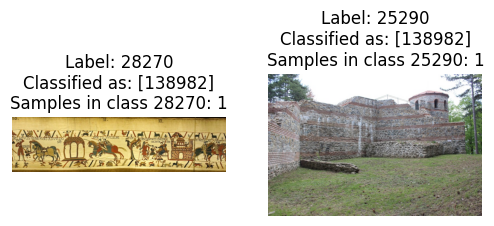

In [68]:
print("good_preds shape:", good_preds.shape)

fig = plt.figure(figsize=(16, 16))
for i in range(min(5, len(good_preds))):
    n = int(good_preds[i, 0])
    img, lbl = get_img_from_num(n, df)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(1, 5, i+1)
    plt.imshow(img)
    lbl2 = np.array(int(good_preds[i,1])).reshape(1,1)
    sample_cnt = list(df.landmark_id).count(lbl)
    plt.title("Label: " + str(lbl) + "\nClassified as: " + str(decode_label(lbl2)) + "\nSamples in class " + str(lbl) + ": " + str(sample_cnt))
    plt.axis('off')
plt.show()